<a href="https://colab.research.google.com/github/ecanaan16/data_bowl/blob/assignment2/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

13
13


Text(0.5, 1.0, 'NFL Frame Visualization: Player Direction & Orientation Frame 10')

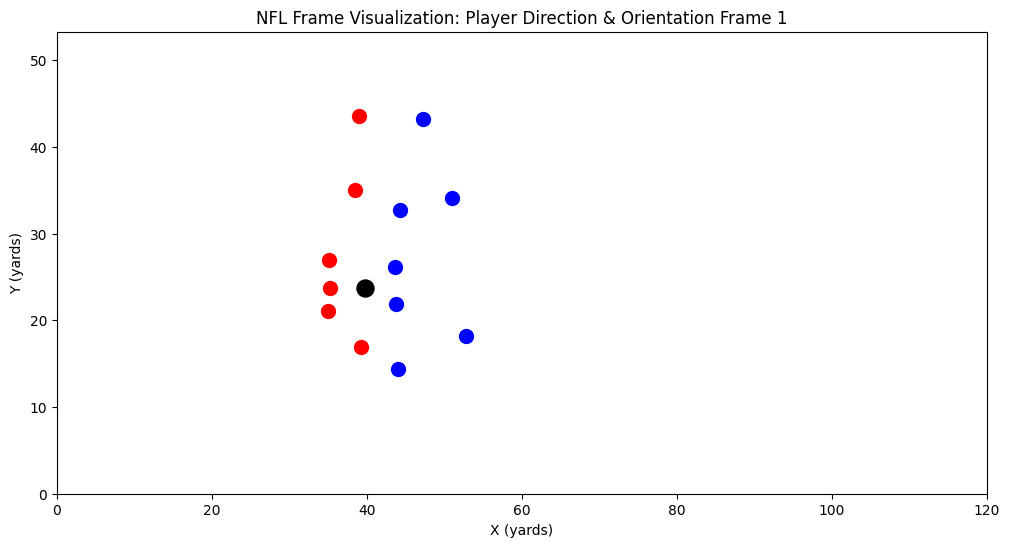

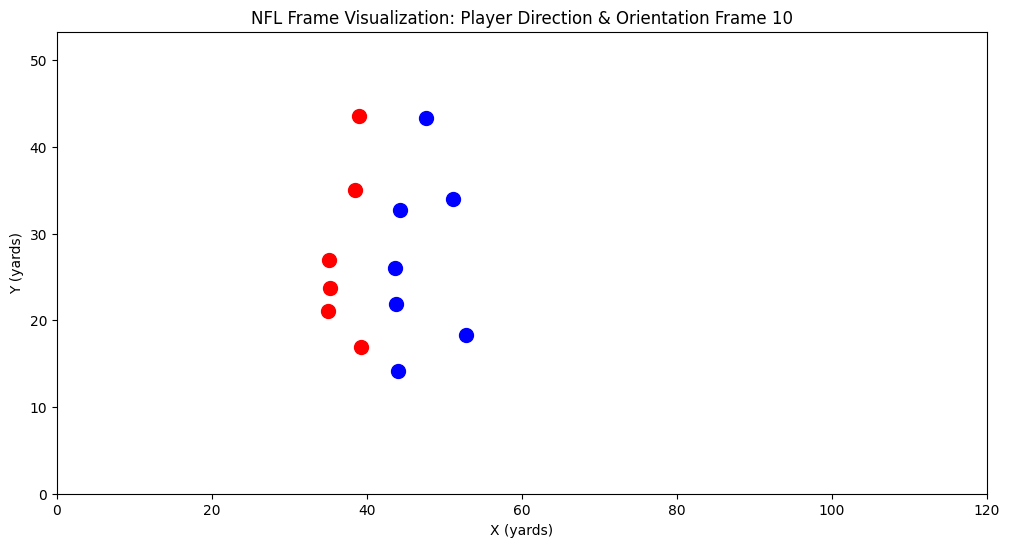

In [26]:
#task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

week8 = pd.read_csv("week8.csv")

filtered1 = week8[(week8["gameId"] == 2018102500) &
                  (week8["playId"] == 103) &
                  (week8["frameId"] == 1)].copy()

filtered10 = week8[(week8["gameId"] == 2018102500) &
                  (week8["playId"] == 103) &
                  (week8["frameId"] == 10)].copy()



print(filtered1["nflId"].nunique())

print(filtered10["nflId"].nunique())


#task 2
def standardize_coords(row):
  if row["playDirection"] == "left":
    row["x_std"] = 120 - row["x"]

  else:
    row["x_std"] = row["x"]

  row["y_std"] = row["y"]

  return row

filtered1 = filtered1.apply(standardize_coords, axis = 1)
filtered10 = filtered10.apply(standardize_coords, axis = 1)

team_colors = {
    "home" : "blue",
    "away" : "red",
    "ball" : "black"
}

colors = filtered1["team"].map(team_colors).fillna("gray")

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)

for idx, row in filtered1.iterrows():
    if row['team'] == 'football':
        # ax.scatter(row['x_std'], row['y_std'], color='black', s=150, label='Football' if idx==filtered1.index[0] else "")
        continue

    # Player scatter point
    ax.scatter(row['x_std'], row['y_std'], color=team_colors.get(row['team'], 'gray'), s=100)

ax.set_xlabel('X (yards)')
ax.set_ylabel('Y (yards)')
ax.set_title('NFL Frame Visualization: Player Direction & Orientation Frame 1')



fig2, ax2 = plt.subplots(figsize=(12,6))
ax2.set_xlim(0, 120)
ax2.set_ylim(0, 53.3)

for idx, row in filtered10.iterrows():
    if row['team'] == 'football':
        ax.scatter(row['x_std'], row['y_std'], color='black', s=150, label='Football' if idx==filtered10.index[0] else "")
        continue

    # Player scatter point
    ax2.scatter(row['x_std'], row['y_std'], color=team_colors.get(row['team'], 'gray'), s=100)

ax2.set_xlabel('X (yards)')
ax2.set_ylabel('Y (yards)')
ax2.set_title('NFL Frame Visualization: Player Direction & Orientation Frame 10')

